In [11]:
cd ..

/workspace


In [12]:
import torch
import train
import model
from utils import get_free_gpu
import utils
import torch.utils.data as torchdata
import get_dataset
import torch.nn as nn
import torch.utils.model_zoo as model_zoo
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
trainset = get_dataset.getdataset(path='/workspace/yolo_RoI_version4_manu(0.6)', type='train')

In [14]:
def print_stats(dataset):
    imgs = np.array([img.numpy() for img, _ in dataset])
    print(f'shape: {imgs.shape}')
    
    min_r = np.min(imgs, axis=(2, 3))[:, 0].min()
    min_g = np.min(imgs, axis=(2, 3))[:, 1].min()
    min_b = np.min(imgs, axis=(2, 3))[:, 2].min()

    max_r = np.max(imgs, axis=(2, 3))[:, 0].max()
    max_g = np.max(imgs, axis=(2, 3))[:, 1].max()
    max_b = np.max(imgs, axis=(2, 3))[:, 2].max()

    mean_r = np.mean(imgs, axis=(2, 3))[:, 0].mean()
    mean_g = np.mean(imgs, axis=(2, 3))[:, 1].mean()
    mean_b = np.mean(imgs, axis=(2, 3))[:, 2].mean()

    std_r = np.std(imgs, axis=(2, 3))[:, 0].std()
    std_g = np.std(imgs, axis=(2, 3))[:, 1].std()
    std_b = np.std(imgs, axis=(2, 3))[:, 2].std()
    
    print(f'min: {min_r, min_g, min_b}')
    print(f'max: {max_r, max_g, max_b}')
    print(f'mean: {mean_r, mean_g, mean_b}')
    print(f'std: {std_r, std_g, std_b}')

In [15]:
print_stats(trainset)

shape: (12571, 3, 224, 224)
min: (0.0, 0.0, 0.0)
max: (1.0, 1.0, 1.0)
mean: (0.25429597, 0.25432256, 0.25452384)
std: (0.03109195, 0.031083336, 0.030992588)


In [12]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from sklearn.model_selection import train_test_split
import torch
# import package 

def get_dataset(train_name, valid_name, test_name, img_path='/workspace/yolo_RoI/'):
    batch_size=32
    if train_name in ['train', 'valid', 'test']:
        # dataset name
        data_transforms = {
            'train': transforms.Compose([
                transforms.Resize([64, 128]),
            #    transforms.RandomCrop(224),
            #    transforms.CenterCrop((256, 128)),
            #    transforms.RandomHorizontalFlip(),
            #    transforms.RandomVerticalFlip(),
            #    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),

                transforms.ToTensor(),
                transforms.Normalize([-0.055694155, -0.055332225, -0.055633955], [0.99793416, 0.9979854, 0.9977238]),
            ]),
            'test': transforms.Compose([
                transforms.Resize([64, 128]),
            #    transforms.CenterCrop((256, 128)),
                transforms.ToTensor(),
                transforms.Normalize([-0.055694155, -0.055332225, -0.055633955], [0.99793416, 0.9979854, 0.9977238]),
            ]),
        }
        # data preprocessing & augmentation

        trainset = datasets.ImageFolder(img_path + train_name + '/', data_transforms['train'])
        validset = datasets.ImageFolder(img_path + valid_name + '/', data_transforms['test'])
        testset = datasets.ImageFolder(img_path + test_name + '/', data_transforms['test'])
    
    else:
        raise ValueError('Dataset %s not found!' % train_name)

    return trainset, validset, testset 

In [13]:
trainset, _, _ = get_dataset('train', 'valid', 'test', '/workspace/yolo_RoI/')

In [14]:
train_loader = torchdata.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

In [16]:
for i in train_loader:
    data1 = i
    img0 = i[0]
    lb0 = i[1]
    break

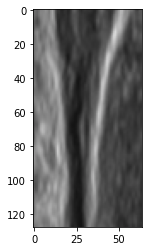

In [17]:
plt.imshow(img0[0].transpose(0,2))

In [18]:
lb0[0]

tensor(0)